# ARIMA

# IMPORT LIBRARY

statsmodels: It provides classes and functions for estimating and testing statistical models. This includes linear and non-linear regression models, time series analysis, and various statistical tests.

pmdarima: This library is specifically designed for time series analysis and provides an implementation of the AutoRegressive Integrated Moving Average (ARIMA) model. It's built on top of statsmodels.

In [5]:
!pip install pmdarima
!pip install statsmodels
!pip install pyramid

In [6]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm


import pyramid
import pmdarima
from pmdarima.arima import auto_arima

import warnings
# Filter out Arrow-related RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="pyarrow")

# IMPORT DATA and PREPARE

<ipython-input-8-c16004e8c592>:13: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, names=cols)


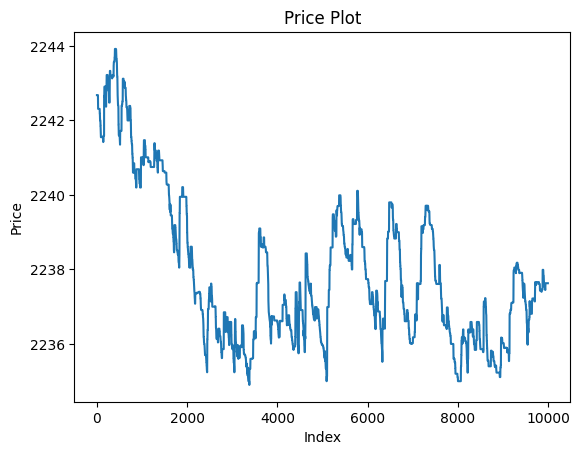

In [8]:
"""
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], index_col = ['Month'])
df.head()
plt.xlabel('Month')
plt.ylabel('Number of air passengers')
plt.plot(df);
"""

# path = "Path ที่นำทางไปสู่ไฟล์ Dataset ที่ต้องการ"
cols = ['id','price','qty','amount','period','bid','offer']
path = "/content/ETHUSDT-trades-2024-01-04.csv"
df = pd.read_csv(path, names=cols)

df['period'] = pd.to_datetime(df['period'], unit='ms', errors='coerce')
df = df[df['bid'] == True]
df = df[ ['id', 'price'] ]
df = df.tail(10000).reset_index(drop=True)

df
#Plot the 'price' column
plt.plot(df['price'])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Price Plot')
plt.show()


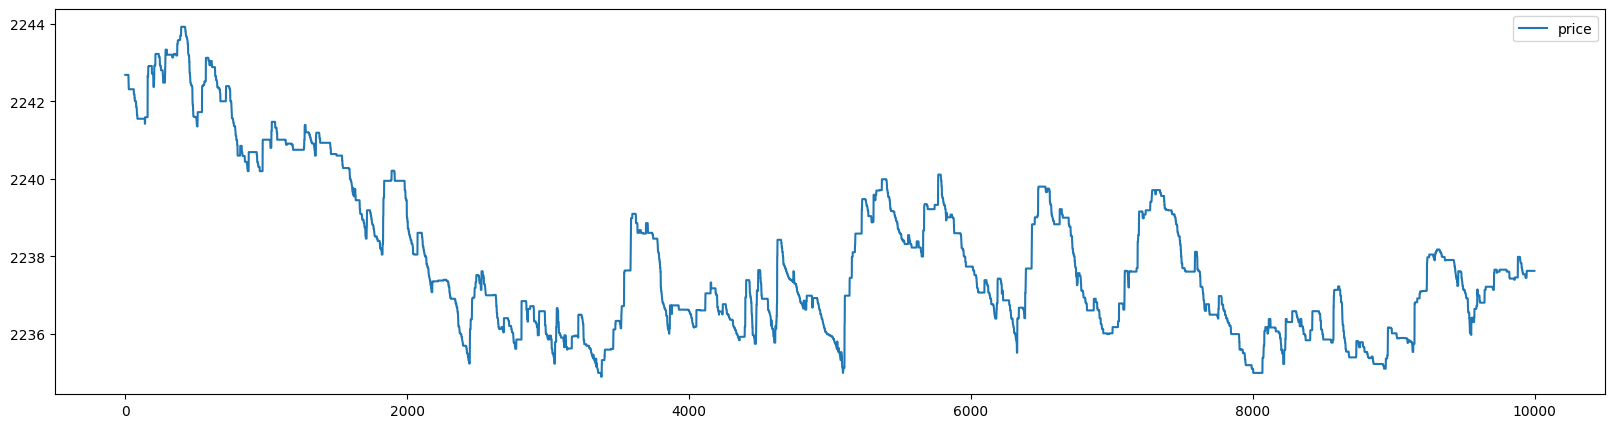

In [9]:
#df['Passengers'].plot(figsize = (20, 5), legend = True);
df['price'].plot(figsize = (20, 5), legend = True);

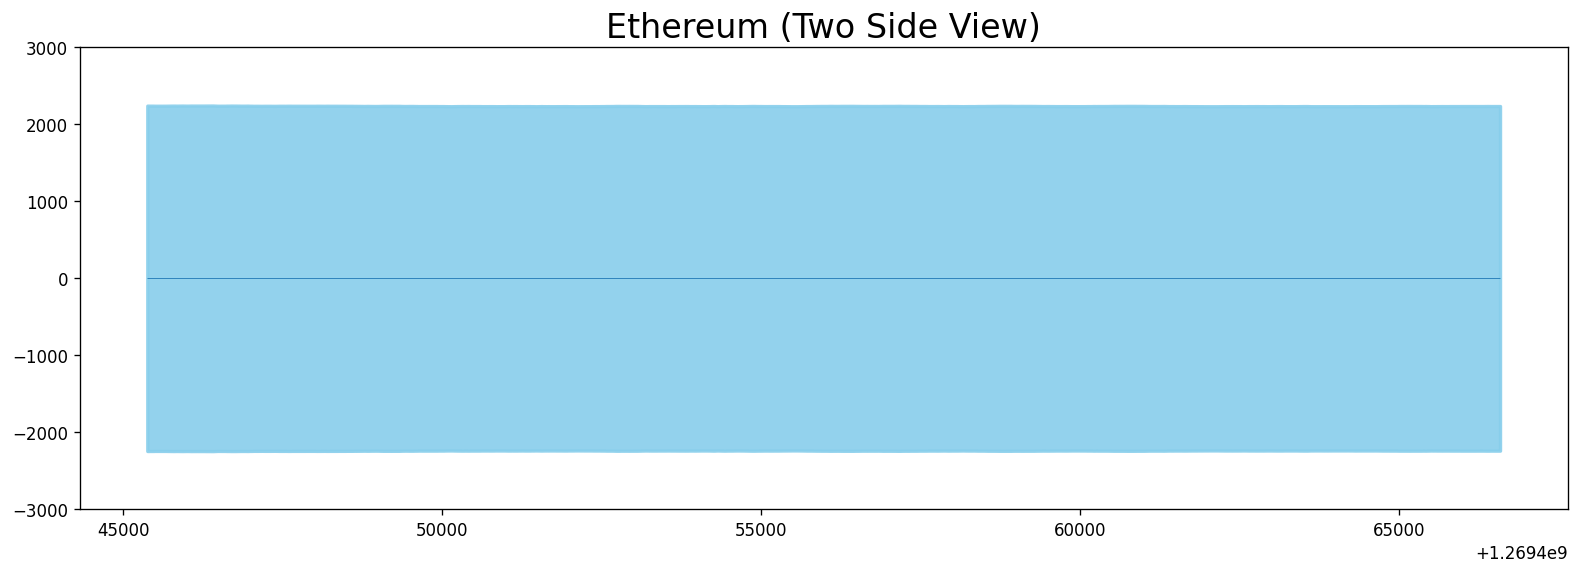

In [10]:
# Plot Two Side View
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
x = df['id'].values
y1 = df['price'].values
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.9, linewidth=2, color='skyblue')
plt.ylim(-3000, 3000)
plt.title('Ethereum (Two Side View)', fontsize=20)
plt.hlines(y=0, xmin=np.min(df.id), xmax=np.max(df.id), linewidth=0.5)
plt.show();

In [11]:
df = df.set_index('id')

# Stationary Test

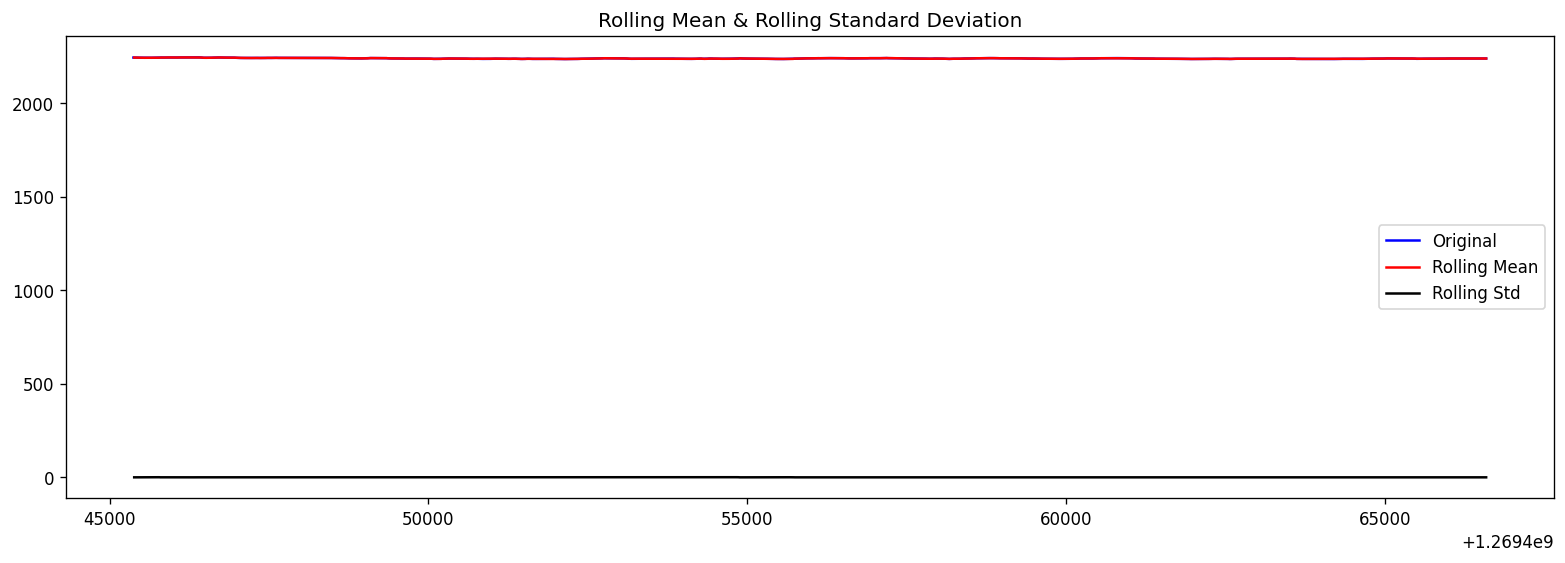

id
1269445375    2242.68
1269445376    2242.68
1269445377    2242.68
1269445378    2242.68
1269445380    2242.68
               ...   
1269466574    2237.63
1269466575    2237.63
1269466576    2237.63
1269466577    2237.63
1269466579    2237.63
Name: price, Length: 10000, dtype: float64

In [12]:
rolling_mean = df.price.rolling(window = 12).mean()
rolling_std = df.price.rolling(window = 12).std()
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

#df.Passengers
df.price

In [13]:
#result = adfuller(df['Passengers'])
result = adfuller(df['price'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.9419711304214857
p-value: 0.04068050668489431
Critical Values:
	1%: -3.431005015196264
	5%: -2.8618294777083033
	10%: -2.5669240838467666


In [14]:
def get_stationarity(timeseries):

    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    #rolling_mean = timeseries.rolling(window=12).mean()
    #rolling_std = timeseries.rolling(window=12).std()

    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    #original = plt.plot(timeseries.price, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey–Fuller test:
    #result = adfuller(timeseries['Passengers'])
    result = adfuller(timeseries['price'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# ลบด้วยค่าเฉลี่ยเคลื่อนที่

,price
id,
1269445375,7.715427
1269445376,7.715427
1269445377,7.715427
1269445378,7.715427
1269445380,7.715427
...,...
1269466574,7.713173
1269466575,7.713173
1269466576,7.713173


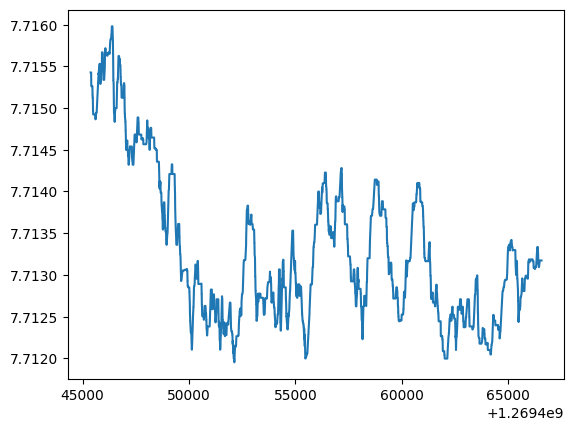

In [15]:
df_log = np.log(df)
plt.plot(df_log)

df_log

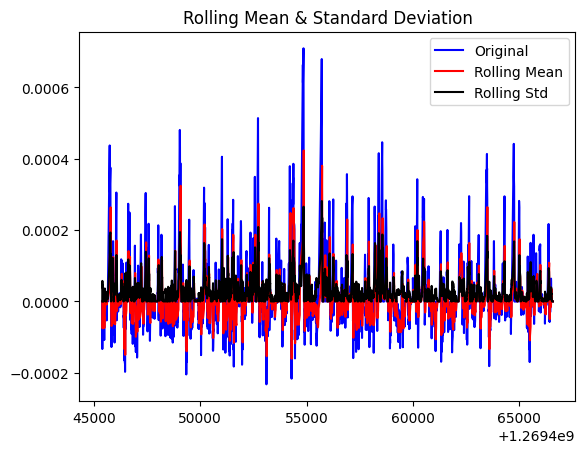

ADF Statistic: -19.599545736105966
p-value: 0.0
Critical Values:
	1%: -3.4310057377047953
	5%: -2.8618297969788036
	10%: -2.5669242537948884


,price
id,
1269445387,0.0
1269445388,0.0
1269445389,0.0
1269445390,0.0
1269445391,0.0
...,...
1269466574,0.0
1269466575,0.0
1269466576,0.0


In [16]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

df_log_minus_mean

อย่างที่เราเห็นหลังจากลบค่าเฉลี่ยค่าเฉลี่ยเคลื่อนที่และส่วนเบี่ยงเบนมาตรฐานจะเป็นแนวนอนโดยประมาณ ค่า p ต่ำกว่าเกณฑ์ 0.05 และสถิติ ADF ใกล้เคียงกับค่าวิกฤต ดังนั้นอนุกรมเวลาจึงเป็น stationaryการใช้การสลายตัวแบบเลขชี้กำลังเป็นอีกวิธีหนึ่งในการแปลงอนุกรมเวลาให้เป็นแบบคงที่

# take_log

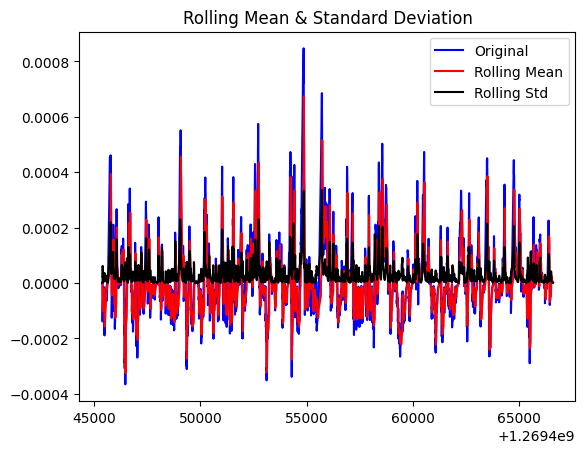

ADF Statistic: -13.988909495631273
p-value: 4.049884095527611e-26
Critical Values:
	1%: -3.4310044252361025
	5%: -2.861829217009766
	10%: -2.5669239450765904


In [17]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

# ลบด้วยค่าก่อนหน้า

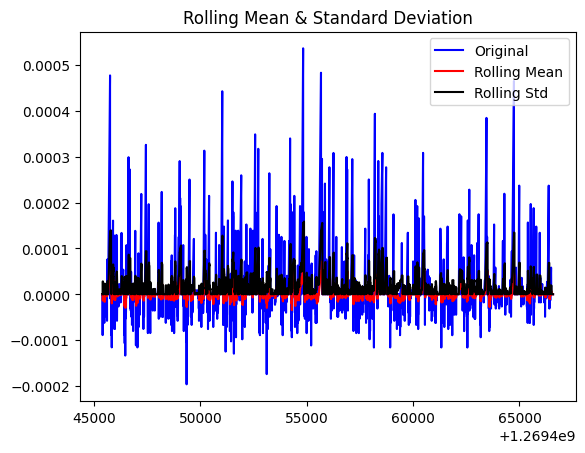

ADF Statistic: -30.275819456495082
p-value: 0.0
Critical Values:
	1%: -3.4310046873093647
	5%: -2.8618293328177886
	10%: -2.566924006721353


id
1269445375    2242.68
1269445376    2242.68
1269445377    2242.68
1269445378    2242.68
1269445380    2242.68
               ...   
1269466574    2237.63
1269466575    2237.63
1269466576    2237.63
1269466577    2237.63
1269466579    2237.63
Name: price, Length: 10000, dtype: float64

In [18]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

df.price

# Analysis for the ARIMA model

# STATEMODEL.API

In [19]:
# 1,1,2 ARIMA Model
df.price
model = sm.tsa.ARIMA(df.price, order=(1,1,2))
result = model.fit()
print(result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                10000
Model:                 ARIMA(1, 1, 2)   Log Likelihood               13735.430
Date:                Sat, 06 Jan 2024   AIC                         -27462.860
Time:                        07:02:53   BIC                         -27434.019
Sample:                             0   HQIC                        -27453.098
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7977      0.026     31.187      0.000       0.748       0.848
ma.L1         -0.6976      0.026    -26.770      0.000      -0.749      -0.647
ma.L2          0.0059      0.007      0.832      0.4

In [20]:
df.price

id
1269445375    2242.68
1269445376    2242.68
1269445377    2242.68
1269445378    2242.68
1269445380    2242.68
               ...   
1269466574    2237.63
1269466575    2237.63
1269466576    2237.63
1269466577    2237.63
1269466579    2237.63
Name: price, Length: 10000, dtype: float64

In [21]:
# 1,1,1 ARIMA Model
model = sm.tsa.ARIMA(df.price, order=(1,1,1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                10000
Model:                 ARIMA(1, 1, 1)   Log Likelihood               13735.334
Date:                Sat, 06 Jan 2024   AIC                         -27464.667
Time:                        07:03:05   BIC                         -27443.036
Sample:                             0   HQIC                        -27457.345
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8097      0.020     41.086      0.000       0.771       0.848
ma.L1         -0.7076      0.023    -30.936      0.000      -0.752      -0.663
sigma2         0.0038      8e-06    469.240      0.0

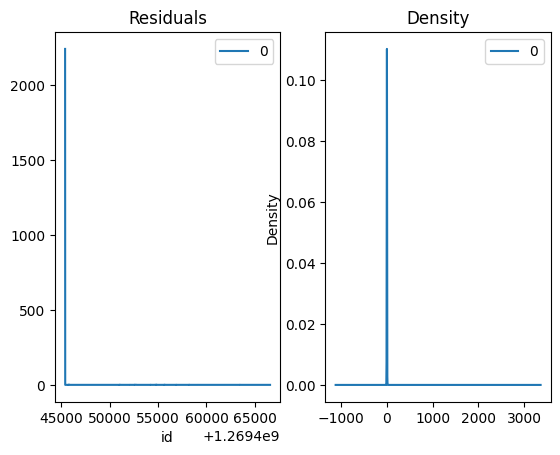

In [22]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# pmdarima

ใช้ pmdarima ซึ่งข้อดีของวิธีนี้คือ เราไม่ต้องมาเดา order ให้ใส่ order ตํ่าสุดสูงสุดไปแทน model จะเลือกให้เราเองอัตโนมัติ

In [23]:
'''
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise
'''

# Fit auto_arima function to ETH price dataset
stepwise_fit = auto_arima(df['price'], start_p = 1, start_q = 1,
						max_p = 2, max_q = 2, m = 4,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=27.67 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-10462.453, Time=1.76 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-24062.848, Time=12.92 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=inf, Time=19.70 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=-10462.467, Time=0.39 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=-21868.923, Time=0.80 sec
 ARIMA(1,0,0)(2,1,0)[4] intercept   : AIC=-24918.241, Time=28.56 sec
 ARIMA(1,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=62.14 sec
 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=32.52 sec
 ARIMA(0,0,0)(2,1,0)[4] intercept   : AIC=-10889.277, Time=9.31 sec
 ARIMA(2,0,0)(2,1,0)[4] intercept   : AIC=-25078.476, Time=33.03 sec
 ARIMA(2,0,0)(1,1,0)[4] intercept   : AIC=-24268.791, Time=20.22 sec
 ARIMA(2,0,0)(2,1,1)[4] intercept   : AIC=inf, Time=47.41 sec
 ARIMA(2,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=44.61 sec
 ARIMA(2,0,1)(2,1,0)[4] intercept   :

In [24]:
# To print the summary
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                10000
Model:             SARIMAX(1, 0, 2)x(2, 1, [1], 4)   Log Likelihood               13479.277
Date:                             Sat, 06 Jan 2024   AIC                         -26942.554
Time:                                     07:28:29   BIC                         -26884.874
Sample:                                          0   HQIC                        -26923.029
                                           - 10000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.648e-05      0.000     -0.828      0.407      -0.000       0.000
ar.L1          0.9958      0.002    496.940      0.000       0.992       1.000
ma.L1          0.2062      0.006     36.459      0.000       0.195       0.217
ma.L2          0.0860      0.005     16.972      0.000       0.076       0.096
ar.S.L4        0.0002      0.009      0.027      0.979      -0.018       0.018
ar.S.L8       -0.0312      0.011     -2.832      0.005      -0.053      -0.010
ma.S.L4       -0.9177      0.007   -133.521      0.000      -0.931      -0.904
sigma2         0.0040   1.35e-05    299.420      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                 108.66   Jarque-Bera (JB):           3265862.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             6.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        90.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Split data into train / test sets
train = df.iloc[:len(df)-600]
test = df.iloc[len(df)-600:] # set 10min x 60 second(600 second) for testing

# Fit a SARIMAX(1, 0, 2)x(2, 1, 1, 4) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['price'],
                order = (1, 0, 2),
                seasonal_order =(2, 1, 1, 4))

result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               price   No. Observations:                 9400
Model:             SARIMAX(1, 0, 2)x(2, 1, [1], 4)   Log Likelihood               12761.190
Date:                             Sat, 06 Jan 2024   AIC                         -25508.379
Time:                                     07:32:05   BIC                         -25458.343
Sample:                                          0   HQIC                        -25491.389
                                            - 9400                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3621.453      0.000       0.999       1.000
ma.L1          0.0950      0.007     13.727      0.000       0.081       0.109
ma.L2          0.1001      0.004     23.180      0.000       0.092       0.109
ar.S.L4        0.0578      0.008      7.478      0.000       0.043       0.073
ar.S.L8        0.0180      0.011      1.599      0.110      -0.004       0.040
ma.S.L4       -0.9988      0.001   -866.086      0.000      -1.001      -0.997
sigma2         0.0039   1.09e-05    356.035      0.000       0.004       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):           3572084.74
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             7.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='id'>

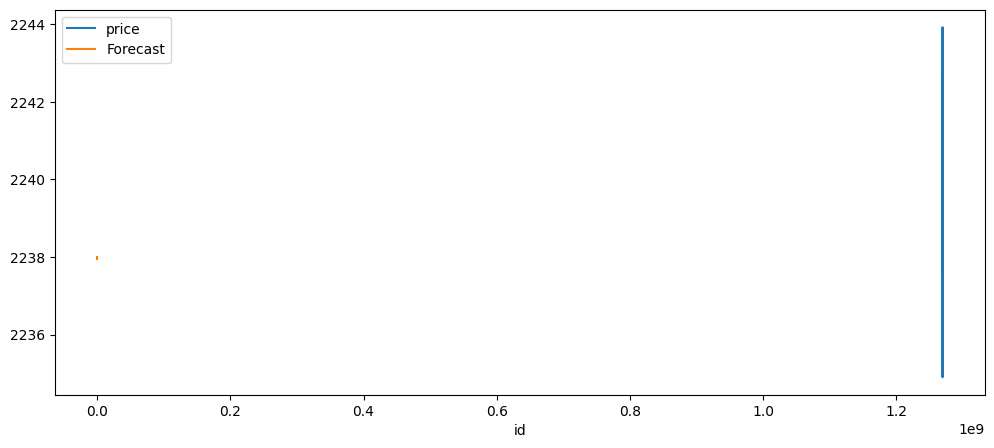

In [27]:
# Forecast for the next 600 period (600 second)
forecast = result.predict(start = len(df),
                          end = (len(df)-1) + 1 * 600,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
df['price'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [28]:
forecast

10000    2237.953461
10001    2237.954083
10002    2237.954950
10003    2237.953059
10004    2237.953737
            ...     
10595    2237.992774
10596    2237.993448
10597    2237.994066
10598    2237.994930
10599    2237.993035
Name: Forecast, Length: 600, dtype: float64